# Advance Bank Term Deposit

## Introduction
This notebook provides a detailed analysis of customer behavior and insights into factors influencing term deposit subscription.

## Load Dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('client sub.csv')
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

## Customer Demographics Analysis

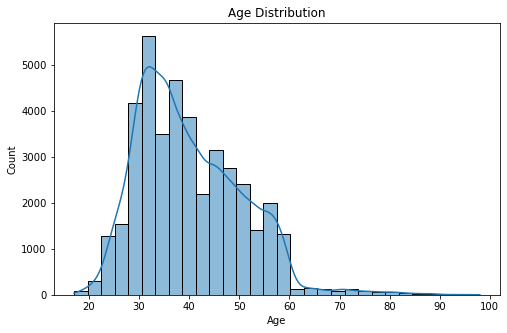

In [15]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


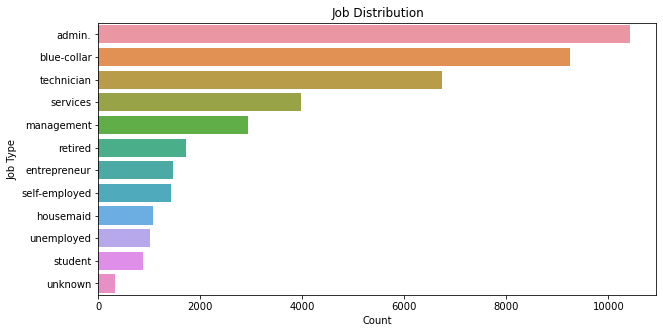

In [16]:
# Job distribution
plt.figure(figsize=(10,5))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title("Job Distribution")
plt.xlabel("Count")
plt.ylabel("Job Type")
plt.show()


## Balance & Deposit Trends

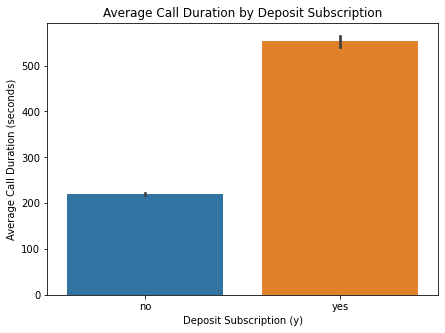

In [20]:
# Average balance by deposit subscription
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.barplot(x='y', y='duration', data=df, estimator=np.mean)
plt.title("Average Call Duration by Deposit Subscription")
plt.xlabel("Deposit Subscription (y)")
plt.ylabel("Average Call Duration (seconds)")
plt.show()


## Campaign Effectiveness

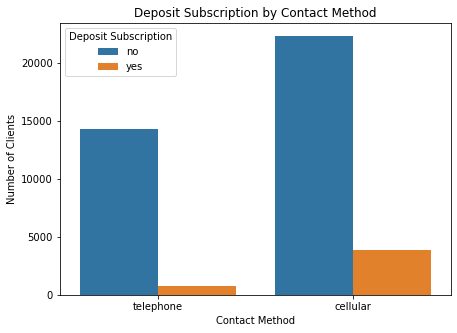

In [21]:
# Contact method analysis
plt.figure(figsize=(7,5))
sns.countplot(x='contact', hue='y', data=df)
plt.title("Deposit Subscription by Contact Method")
plt.xlabel("Contact Method")
plt.ylabel("Number of Clients")
plt.legend(title="Deposit Subscription")
plt.show()

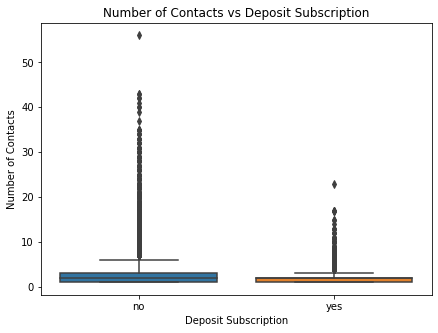

In [22]:
# Number of contacts vs deposit subscription
plt.figure(figsize=(7,5))
sns.boxplot(x='y', y='campaign', data=df)
plt.title("Number of Contacts vs Deposit Subscription")
plt.xlabel("Deposit Subscription")
plt.ylabel("Number of Contacts")
plt.show()

## Correlation Heatmap

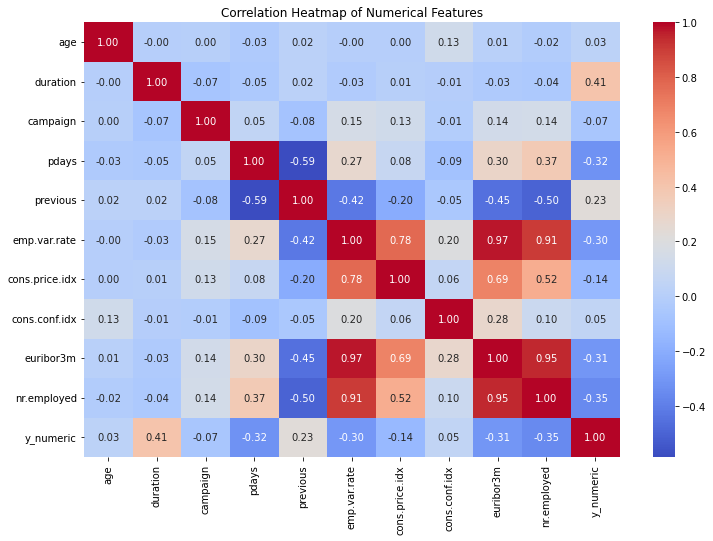

In [23]:
# Correlation of numerical variables
import matplotlib.pyplot as plt
import seaborn as sns

# Convert target 'y' to numeric: 1 = yes, 0 = no
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## Predictive Modeling (Logistic Regression)

Accuracy: 0.9163631949502307

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



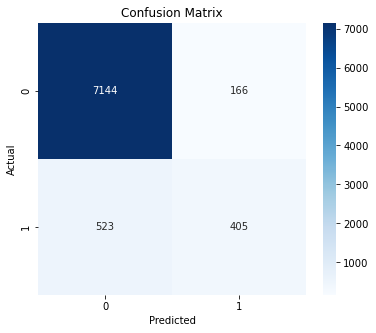

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variables
# Convert target to numeric
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

# Identify categorical features
categorical_cols = df.select_dtypes(include='object').columns.drop('y')

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#Split Features & Target

X = df_encoded.drop(['y', 'y_numeric'], axis=1)
y = df_encoded['y_numeric']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Scale Features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Train Logistic Regression Model

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

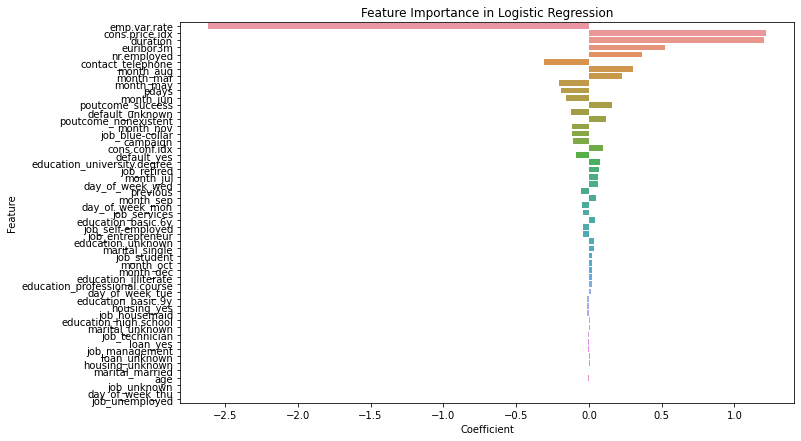

In [27]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(11,7))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance in Logistic Regression")
plt.show()

## Key Takeaways
- Certain age groups and job categories are more likely to subscribe.
- Higher balances correlate with higher subscription rates.
- Cellular contact is more effective than telephone.
- Campaign duration and number of contacts influence outcomes.
- Logistic regression shows which features are strongest predictors.